In [1]:
import h5py
import glob
import numpy as np
year = 2001
fn_list = sorted(glob.glob('/storage/coda1/p-rbras6/0/njadidoleslam3/gpm1.gesdisc.eosdis.nasa.gov/data/GPM_L3/GPM_3IMERGHH.06/{year}/*/*.HDF5'.format(year = year)))


In [5]:
# data1 = np.ones((3600, 1800, int(len(fn_list)/2)), dtype=np.int16)
# for i, fn in enumerate(fn_list):
#     f = h5py.File(fn, 'r')
#     dset = f['Grid/precipitationCal'][0,:,0:180]
# #     # temp = np.fliplr(dset)
# #     # data1[:, :, i] = np.transpose(temp)
#     dset[dset==-9999.9] = -99
#     dset = dset*100
#     data1[:, :, i] = dset.astype(np.int16)
# # p_data.reshape((int(p_data.shape[0]/2),2)).mean(axis=1)

In [29]:
fn = '/storage/coda1/p-rbras6/0/njadidoleslam3/gpm/virt_ds/2001.h5'
f = h5py.File(fn, 'r')


In [31]:
for dset in f['precipitationCal']:
    np.shape(dset)

KeyboardInterrupt: 

In [21]:
fn = '/storage/coda1/p-rbras6/0/njadidoleslam3/gpm/time/2020/01.h5'
f = h5py.File(fn_list[0], 'r')
# dset = f['precipitationCal'][:,:,:]

In [2]:
import xarray as xar


In [3]:
drop_vars =  [
    'time_bnds',
 'lon_bnds',
 'lat_bnds',
 'precipitationUncal',
 'randomError',
 'HQprecipitation',
 'HQprecipSource',
 'HQobservationTime',
 'IRprecipitation',
 'IRkalmanFilterWeight',
 'probabilityLiquidPrecipitation',
 'precipitationQualityIndex']
dset = xar.open_mfdataset(fn_list[:1000], parallel = False, group='Grid', data_vars='minimal', drop_variables=drop_vars, concat_dim=['time'], coords=['time'], combine='by_coords')

In [10]:
dset['precipitationCal'][:,0,0].data

dask.array<getitem, shape=(1000,), dtype=float32, chunksize=(1,), chunktype=numpy.ndarray>

In [24]:
a['precipitationCal'].load()

KeyboardInterrupt: 

In [192]:
a1 = dset.chunk(chunks={"time": 1000, "lon": 145, "lat": 1800 })

In [197]:
a1['precipitationCal'].load()

/storage/home/hcoda1/6/njadidoleslam3/venvs/spatialenv/lib/python3.9/site-packages/dask/array/numpy_compat.py:39: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


KeyboardInterrupt: 

In [183]:
dset = dset.resample(time='1H').mean()

In [171]:
dset = dset*100



In [191]:
dset['precipitationCal'][:,0,0]

<xarray.DataArray 'precipitationCal' (time: 500)>
dask.array<getitem, shape=(500,), dtype=float32, chunksize=(1,), chunktype=numpy.ndarray>
Coordinates:
  * time     (time) object 2020-01-01 00:00:00 ... 2020-01-21 19:00:00
    lon      float32 -179.9
    lat      float32 -89.95

In [173]:
print('{:.2f}'.format(dset.nbytes/1024**3) , 'GB')
dset

12.07 GB


,Array,Chunk
Bytes,12.07 GiB,1.00 MiB
Shape,"(500, 3600, 1800)","(1, 145, 1800)"
Count,151000 Tasks,12500 Chunks
Type,float32,numpy.ndarray


In [190]:
aa = dset.astype(np.float16)
aa.nbytes/1024**3*17

102.59490013122559

In [186]:
aa.chunk()

KeyboardInterrupt: 

In [145]:
dset.nbytes/(1024**3)*17

205.1893949508667

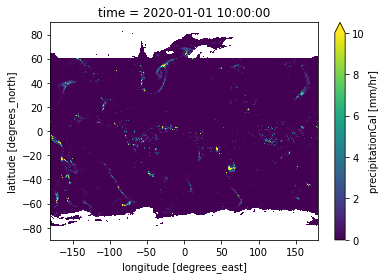

In [122]:
dset['precipitationCal'][0,:,:].plot.imshow(x = 'lon', y = 'lat',vmin= 0, vmax = 10 )

AttributeError: '_PlotMethods' object has no attribute 'scatter'

In [79]:
dset.nbytes*(2 ** -30)

2.6554474979639053

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# lon, lat =np.meshgrid(lon,lat)

fig, ax = plt.subplots(figsize=(20,10))
a = ax.imshow(data1[:, :, i], vmin=0, vmax = 500, cmap=plt.cm.Blues)
cax = plt.axes([0.92, 0.25, 0.02, 0.5])
plt.colorbar(a, cax=cax)